# Exempel på plottning, beräkningar m.m.

In [1]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, quad

#Fysikaliska konstanter, enhetsomvandlingar m.m. Allt i SI-enheter
atm=1.01325E5   #1 atm i pascal
torr=atm/760.0  #1 torr i pascal
R=8.3145   #Gaskonstanten
g=9.807    #jordaccelerationen
NA=6.022e23   #Avogadros tal
kB=R/NA    #Boltzmanns konstant
def tok(x): return x+273.15     #Funktion som omvandlar från grader till Kelvin
cal=4.184    #1 cal i joule    
kcal=1000*cal  #1 kcal i joule 
e0=1.6021765e-19  #Elementarladdningen
F=NA*e0    #Faradays konstant
eps0=8.854188e-12  #Vakuumpermittiviteten
h=6.62607e-34  #Plancks konstant
epsw=78.54    #Dielektricitetskonstanten för vatten vid 25 grader
D=3.33e-30  #Debye in Cm


## Numerisk ekvationslösning

Exempel: Lös ekvationen e<sup>x</sup> = x<sup>2</sup>

In [2]:
xsol,=fsolve(lambda x: exp(x)-x**2, 4)
print(xsol)


-0.7034674224983917


Första argumentet till fsolve är en funktion f(x), som enklast definieras på samma rad genom lambda-konstruktionen. Andra argumentet är ett startvärde för x som fsolve sedan använder för att leta efter ett x som ger f(x)=0.

Kommentar: fsolve kan lösa flerdimensionella system och returnerar därför en array. Kommatecknet före likamedtecknet gör att xsol bara innehåller själva talet i arrayen

## Plottning

Exempel: Plotta funktionen $y(x)=x^n\ln x$ för olika värden på parametern $n$. Låt $x$ variera i intervallet (1,2).

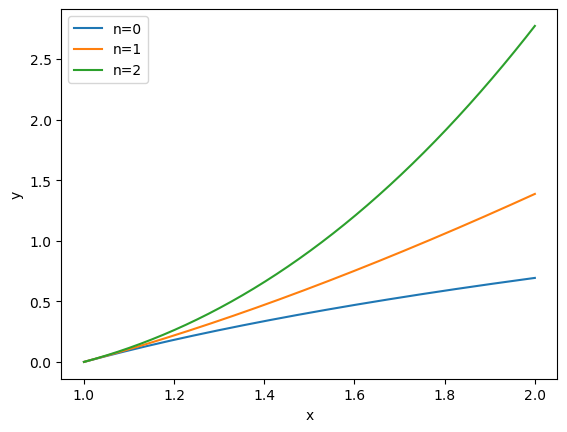

In [3]:
x=linspace(1,2,num=200) #200 values between 1 and 2
plt.plot(x,log(x),label='n=0')
plt.plot(x,x*log(x),label='n=1')
plt.plot(x,x**2*log(x),label='n=2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Linjär regression

Exempel: För kvantprickar (nobelpris i kemi 2023) gäller följande samband mellan excitationsenergin E (som avgör i vilken färg partiklarna fluorescerar) och partikelns storlek $L$:

$E=a\cdot\dfrac{1}{L^2}+b$

Bestäm konstanterna $a$ och $b$ utifrån följande data:

|L/nm |  E/aJ |
| --- | --- |
| 1.99 |  0.372 |
| 2.23 |  0.339 |
| 2.49 |  0.316 |
| 2.82 |  0.293 |
| 3.01 |  0.283 |


a= 6.222830216394419e-37    b= 2.1468509444665976e-19


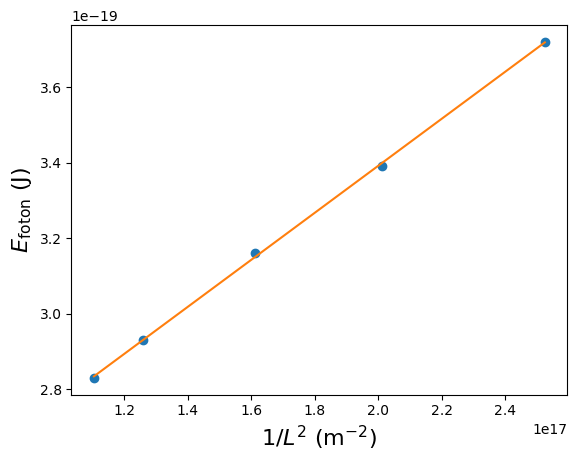

In [4]:
y=array([0.372, 0.339, 0.316, 0.293, 0.283])*1e-18
L=array([1.99,2.23,2.49,2.82,3.01])*1e-9
x=1/L**2
plt.plot(x,y,'o')
fitp=polyfit(x,y,1)
plt.plot(x,polyval(fitp,x),'-')
plt.xlabel(r'$1/L^2$ (m$^{-2}$)', fontsize=16)
plt.ylabel(r'$E_\mathrm{foton}$ (J)', fontsize=16)
print("a=",fitp[0], "   b=", fitp[1])

Funktionen polyfit returnerar alltså en array med längden (n+1) där n är det anpassade polynomets grad. Det första elementet i arrayen är koefficienten för den "högstgradiga"  termen i polynomet, alltså a om det är linjär regression y=ax+b. Notera hur polyval kan användas för att rita den anpassade linjen (om polynomet hade haft högre grad hade det förstås behövts fler punkter för att få kurvan jämn). Notera också tipset hur man kan använda r-strängar och Latex-syntax för att inkludera matematisk formatering i figuren.

## Numerisk integrering

Exempel: Beräkna integralen $\int_1^2 (x^2 \ln x) dx$

In [ ]:
result,error=quad(lambda x: x**2*log(x), 1, 2)
print(result)

1.07061470371541


Första argumentet är en funktion f(x) som innehåller integranden (det som ska integreras). Andra och tredje argumentet är integrationsgränserna.

Kommentar: quad returnerar både resultatet och det numeriska felet, som för normala funktioner är ett mycket litet värde och därför kan ignoreras.

## Numerisk lösning av ordinär differentialekvation

Beräkna y(5) om y(1)=0.5 och y'=cos(xy-x<sup>2</sup>).

y(5.000000)=1.628261


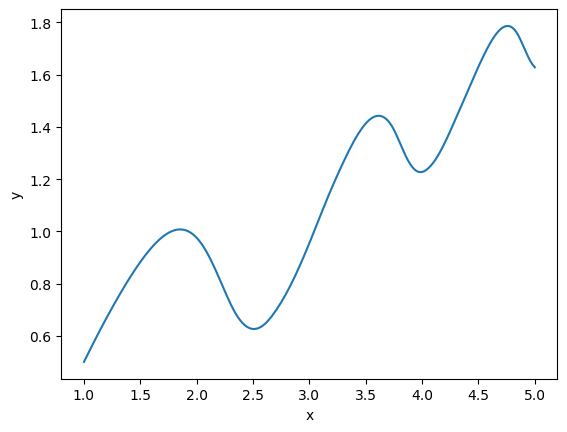

In [5]:
x0=1     #Startvärde på x
x1=5     #Slutvärde på x
y0=0.5   # Startvärde på y, alltså y(x0)
res=solve_ivp(lambda x,y: cos(x*y-x**2), [x0,x1], array([y0]), t_eval=linspace(x0,x1,num=200))
xvec=res.t
yvec = res.y.flatten()
plt.plot(xvec,yvec)
plt.xlabel('x')
plt.ylabel('y')
print('y(%f)=%f' % (xvec[-1],yvec[-1])) #Skriv ut funktionens värde i slutpunkten


Första argumentet till solve_ivp är en funktion av två variabler x och y, som ska returnera derivatan y', alltså dy/dx. Andra argumentet är det intervall (x0,x1) som x ska variera inom. Vi måste i förväg veta funktionens värde i x0, alltså y(x0), och vi söker ofta funktionens värde i x1, alltså y(x1), men vi kan förstås vara intresserade av funktionens beteende i hela intervallet. Tredje argumentet är startvärdet y(x0), men eftersom funktionen tillåter vektorvärda funktioner så ska startvärdet ges som en array, vilken bara innehåller det ensamma talet y(x0) om y är en skalär storhet och ingen vektor. Det finns också ett antal frivilliga argument, det mest användbara är t_eval som tillåter oss att specificera precis vilka x-värden vi vill returnera y för. Om vi utelämnar detta argument så får vi ofta bara ett tiotal punkter vilket ger hackiga plottar även om det inte påverkar noggrannheten i resultaten.

Funktionen returnerar en datastruktur, vars viktigaste fält heter t och y, och innehåller x-värden respektive y-värden för den framräknade funktionen. Om vi skickat in en array med hjälp av t_eval, så bör den returnerade t-arrayen vara identisk med den. Observera att y innehåller en matris (tvådimensionell array) som har flera rader om y är en vektorvärd funktion, men bara en rad om y är en vanlig skalär funktion. I det senare fallet kan man använda flatten() för att omvandla den till en vanlig endimensionell array, som i exemplet.

[-33692.73183421    103.38116328]
325.9078420549089


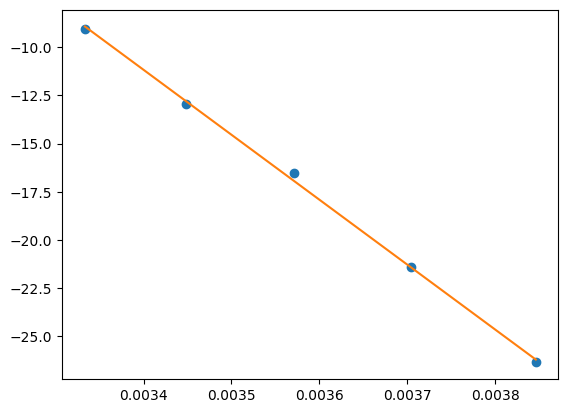

In [6]:
#Exemplet på föreläsningen
T=array([260,270,280,290,300])
p=array([0.042,0.076,0.137,0.211,0.337])*1e5 #Pa
x=1/T
p0=1e5 #Pa
y=R*log(p/p0)
fitp=polyfit(x,y,1)
print(fitp)
plt.plot(x,y,'o')
plt.plot(x,polyval(fitp,x),'-')
print(-fitp[0]/fitp[1])